Use the data provided in take_home_user_engagment.csv & takehome_user.csv. to find the users who logged into the product for 3 days straight or at least once in a 7 day period

In [1079]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from math import trunc

In [1080]:
engagement = pd.read_csv('takehome_user_engagement.csv')
data = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")

In [1081]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [1082]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [1083]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


Fix data types

In [1084]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
data['creation_time'] = pd.to_datetime(data['creation_time'])
data['last_session_creation_time'] = data['last_session_creation_time'].apply(lambda x: dt.datetime.fromtimestamp(trunc(x)) if x==x else pd.NaT)

In [1085]:
data = data.drop(columns=['name','email'])

In [1086]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [1087]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [1088]:
grouped = engagement.set_index('time_stamp').sort_index().groupby('user_id').rolling('7D').visited.sum()

In [1089]:

df_7d_sum = pd.DataFrame(grouped)
df_7d_sum = df_7d_sum.rename(columns={'visited':'visit_count'})
df_7d_sum

visit_count
user_id time_stamp                      
1       2014-04-22 03:53:30          1.0
2       2013-11-15 03:45:04          1.0
        2013-11-29 03:45:04          1.0
        2013-12-09 03:45:04          1.0
        2013-12-25 03:45:04          1.0
...                                  ...
11996   2013-09-06 06:14:15          1.0
11997   2013-01-15 18:28:37          1.0
11998   2014-04-27 12:45:16          1.0
11999   2012-06-02 11:55:59          1.0
12000   2014-01-26 08:57:12          1.0

[207917 rows x 1 columns]

In [1090]:
df_7d_sum[df_7d_sum['visit_count']>=3]

visit_count
user_id time_stamp                      
2       2014-02-09 03:45:04          3.0
        2014-02-13 03:45:04          3.0
10      2013-02-19 22:08:03          3.0
        2013-03-02 22:08:03          3.0
        2013-03-05 22:08:03          3.0
...                                  ...
11988   2014-05-23 11:04:47          6.0
        2014-05-24 11:04:47          6.0
        2014-05-26 11:04:47          5.0
        2014-05-27 11:04:47          5.0
        2014-06-01 11:04:47          3.0

[160522 rows x 1 columns]

In [1091]:
result_df = pd.DataFrame(df_7d_sum['visit_count'].groupby('user_id').max())
result_df

,visit_count
user_id,
1,1.0
2,3.0
3,1.0
4,1.0
5,1.0
...,...
11996,1.0
11997,1.0
11998,1.0


In [1092]:
data = data.rename(columns={'object_id':'user_id'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 750.1+ KB


In [1093]:

df = pd.merge(data, result_df, how='left', on='user_id')
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visit_count
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0,3.0
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 03:14:20,0,0,193,5240.0,1.0


In [1094]:

df['adopted_user'] = df['visit_count'].apply(lambda x: 1 if x>=3 else 0)
df.head()

,user_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visit_count,adopted_user
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0,1.0,0
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0,3.0,1
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0,1.0,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0,1.0,0
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 03:14:20,0,0,193,5240.0,1.0,0


In [1095]:

df.describe()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visit_count,adopted_user
count,12000.00000,12000.000000,12000.000000,12000.000000,6417.000000,8823.000000,12000.000000
mean,6000.50000,0.249500,0.149333,141.884583,5962.957145,1.866259,0.133500
std,3464.24595,0.432742,0.356432,124.056723,3383.761968,1.812267,0.340128
min,1.00000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,3058.000000,1.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,5954.000000,1.000000,0.000000
75%,9000.25000,0.000000,0.000000,238.250000,8817.000000,1.000000,0.000000
max,12000.00000,1.000000,1.000000,416.000000,11999.000000,7.000000,1.000000


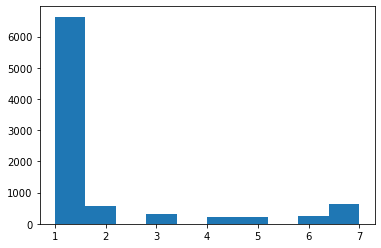

In [1096]:
_ = plt.hist(df['visit_count'], bins=10)

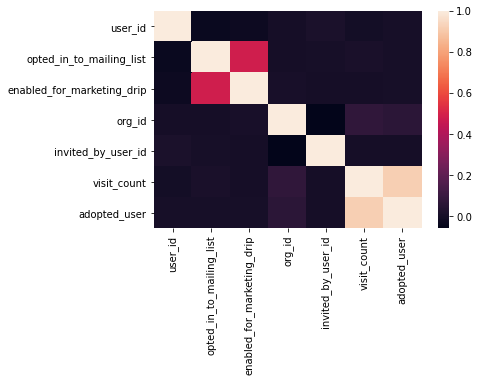

In [1097]:
sns.heatmap(df.corr())
plt.show()

In [1098]:

nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
invited_by_user_id,0.46525
visit_count,0.26475
last_session_creation_time,0.26475


Features

In [1099]:
# looking at the data we have a lot of nulls
# for last session creation time we can fill with values from the creation time
# the rest of columns we can fill with 0s
df1 = df.copy()

In [1100]:
#import libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [1101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   creation_source             12000 non-null  object        
 3   last_session_creation_time  8823 non-null   datetime64[ns]
 4   opted_in_to_mailing_list    12000 non-null  int64         
 5   enabled_for_marketing_drip  12000 non-null  int64         
 6   org_id                      12000 non-null  int64         
 7   invited_by_user_id          6417 non-null   float64       
 8   visit_count                 8823 non-null   float64       
 9   adopted_user                12000 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [1102]:
#drop time variable 
#visit_count is highly co-related to adopted_users if we it in the model, it will deliver perfect results 
df1 = df1.drop(columns=['creation_time','last_session_creation_time','visit_count'])
df1.head()

,user_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,GUEST_INVITE,1,0,11,10803.0,0
1,2,ORG_INVITE,0,0,1,316.0,1
2,3,ORG_INVITE,0,0,94,1525.0,0
3,4,GUEST_INVITE,0,0,1,5151.0,0
4,5,GUEST_INVITE,0,0,193,5240.0,0


In [1103]:
df1 = df1.dropna()
# get are dependent and independent variables
X = df1.drop('adopted_user',axis=1)
y = df1.adopted_user

X = pd.get_dummies(X)
X.head()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE
0,1,1,0,11,10803.0,1,0
1,2,0,0,1,316.0,0,1
2,3,0,0,94,1525.0,0,1
3,4,0,0,1,5151.0,1,0
4,5,0,0,193,5240.0,1,0


In [1104]:
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale data to normalize distribution
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [1105]:
classifier  = LogisticRegression(class_weight= 'balanced',max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [1106]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[838 796]
 [122 170]]


In [1107]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.523


In [1108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.51      0.65      1634
           1       0.18      0.58      0.27       292

    accuracy                           0.52      1926
   macro avg       0.52      0.55      0.46      1926
weighted avg       0.77      0.52      0.59      1926

